In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥1.0.2 is required
import sklearn
assert sklearn.__version__ >= "1.0.2"

# Common imports
import numpy as np
import os
import pandas as pd
import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)


# Load and process data

In [3]:
# read data from csv file
trainset = pd.read_csv('../datasets/dataset_MonteCarlo_100.000/trainset.csv')
testset = pd.read_csv('../datasets/dataset_MonteCarlo_100.000/testset.csv')
print(trainset.shape)
print(testset.shape)

(80000, 15)
(20000, 15)


In [4]:
trainset

,0_Ca,0_Cl,0_Na,0_K,0_N5,1_Ca,1_Cl,1_Na,1_K,1_N5,out_Ca,out_Cl,out_Na,out_K,out_N5
0,0.341575,1.159034,0.012636,0.451710,0.794808,0.347226,0.116634,0.755911,0.674340,1.359338,0.3233,1.1590,0.02901,0.4719,0.79480
1,0.638607,0.558054,1.231009,0.243433,1.132821,0.038278,0.185744,0.734268,1.464984,1.489907,0.4584,0.5581,1.24700,0.5882,1.13300
2,0.787981,0.763241,0.349968,0.738449,1.452716,1.117356,0.110285,0.393380,0.282715,1.466671,0.8053,0.7632,0.34980,0.7038,1.45300
3,0.466115,0.948450,0.942671,1.051085,1.358636,0.470234,0.252135,0.914662,1.318543,1.076570,0.4558,0.9484,0.94180,1.0730,1.35900
4,0.452663,0.644895,1.360873,0.991130,0.162887,1.361588,1.475943,0.637112,0.397679,1.414160,0.4939,0.6449,1.34300,0.9266,0.16290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.796601,0.398041,1.132371,0.996845,0.094560,1.074895,1.055513,0.777877,0.870241,0.361988,0.8083,0.3980,1.12600,0.9802,0.09456
79996,0.942419,1.456538,1.164360,0.775981,0.069458,1.024540,1.025283,0.144121,1.438743,0.241862,0.9305,1.4570,1.15000,0.8141,0.06946
79997,1.095302,0.438446,1.335379,0.365207,0.273701,0.765942,0.880543,1.152310,1.119219,1.104459,1.0670,0.4384,1.33500,0.4223,0.27370
79998,0.310626,0.661302,0.192742,1.280823,0.931653,0.199012,0.072267,0.870017,0.563615,0.006399,0.3275,0.6613,0.21380,1.2260,0.93170


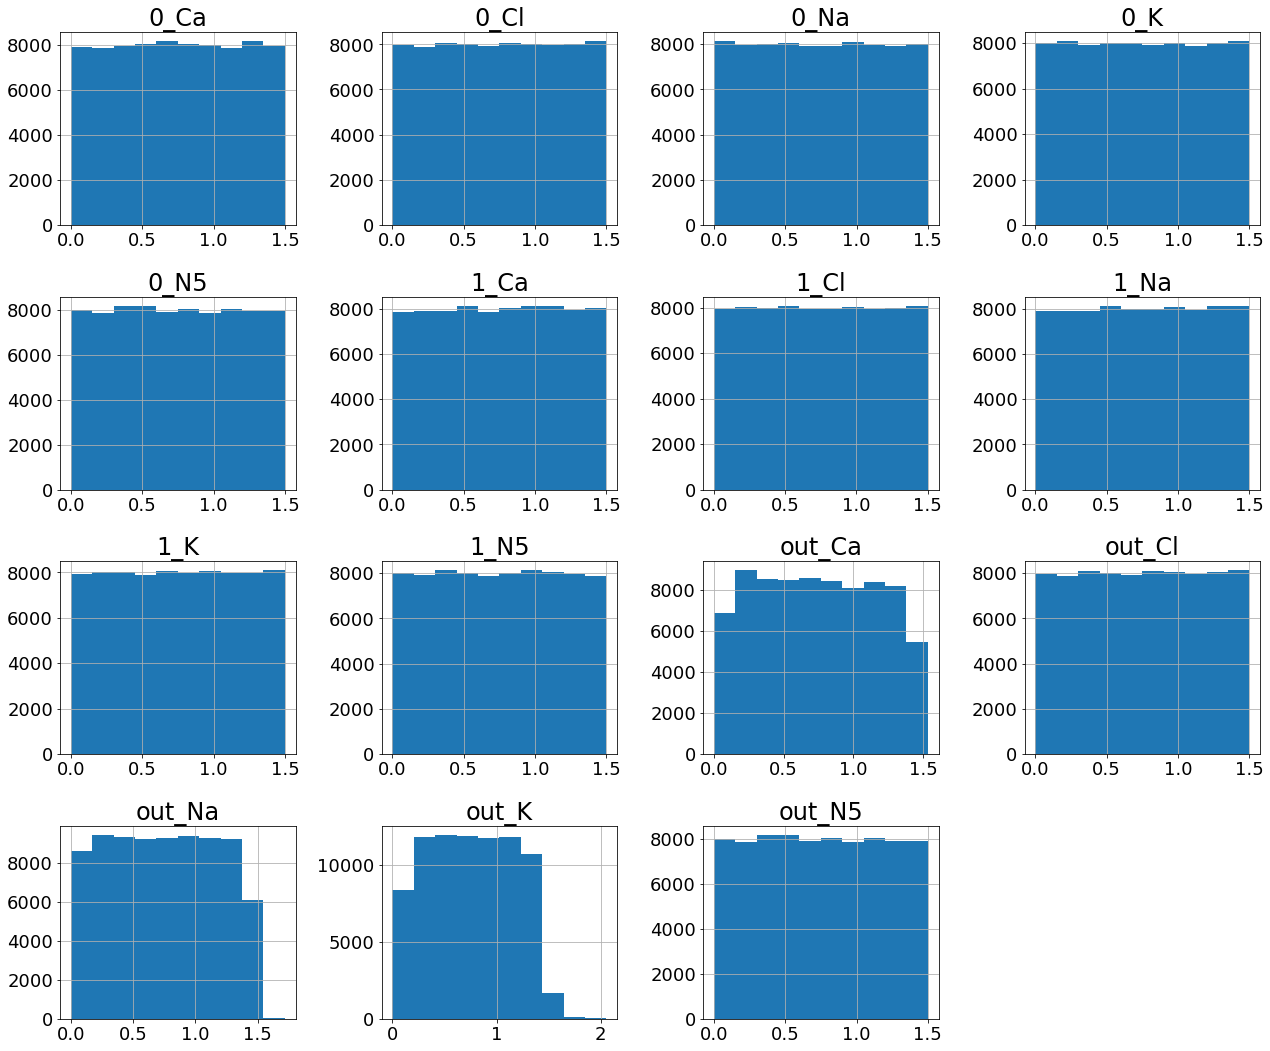

In [5]:
trainset.hist(figsize=(18, 15));
plt.tight_layout()

In [6]:
# split x and y
X_train = trainset.iloc[:, [0,2,3,5,7,8]].values 
y_train = trainset.iloc[:, [10, 12, 13]].values
X_test = testset.iloc[:, [0,2,3,5,7,8]].values 
y_test = testset.iloc[:, [10, 12, 13]].values

# Name variables
inputs = [list(trainset)[i] for i in [0,2,3,5,7,8]] 
outputs = [list(trainset)[i] for i in [10, 12, 13]] # do not work for list -> list(trainset)[10, 12, 13]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

In [8]:
print('Inputs: ', inputs)
print('Outputs: ', outputs)
print('X_train instances: ', X_train.shape)
print('X_test instances: ', X_test.shape)
print('X_val instances: ', X_val.shape)
print('y_train instances: ', y_train.shape)
print('y_test instances: ', y_test.shape)
print('y_val instances: ', y_val.shape)

Inputs:  ['0_Ca', '0_Na', '0_K', '1_Ca', '1_Na', '1_K']
Outputs:  ['out_Ca', 'out_Na', 'out_K']
X_train instances:  (64000, 6)
X_test instances:  (20000, 6)
X_val instances:  (16000, 6)
y_train instances:  (64000, 3)
y_test instances:  (20000, 3)
y_val instances:  (16000, 3)


## Normalize data

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

norm_pipeline = Pipeline([
        ('minmax_scaler', MinMaxScaler((-1,1))),
    ])

X_train_norm = norm_pipeline.fit_transform(X_train)
X_test_norm = norm_pipeline.transform(X_test)
X_val_norm = norm_pipeline.transform(X_val)

# TF-Transformer

In [10]:
# Requirements:
!pip install rtdl
!pip install libzero==0.0.4

In [11]:
import rtdl
import torch
import torch.nn as nn
import torch.nn.functional as F
import zero

/home/viluiz/anaconda3/envs/py3ml2-tab/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
print('torch.cuda.is_available:\t',torch.cuda.is_available())
print('torch.cuda.device_count:\t',torch.cuda.device_count())
print('torch.cuda.current_device:\t',torch.cuda.current_device())
print('torch.cuda.device:\t\t',torch.cuda.device(0))
print('torch.cuda.get_device_name:\t',torch.cuda.get_device_name(0))

torch.cuda.is_available:	 True
torch.cuda.device_count:	 1
torch.cuda.current_device:	 0
torch.cuda.device:		 <torch.cuda.device object at 0x7fcff20c2b50>
torch.cuda.get_device_name:	 Quadro RTX 4000


In [13]:
#device = torch.device('cpu')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Docs: https://yura52.github.io/zero/0.0.4/reference/api/zero.improve_reproducibility.html
zero.improve_reproducibility(seed=123456)

123456

In [14]:
X_train_norm = torch.tensor(X_train_norm.astype('float32')).to(device)
X_test_norm = torch.tensor(X_test_norm.astype('float32')).to(device)
y_train = torch.tensor(y_train.astype('float32')).to(device)
y_test = torch.tensor(y_test.astype('float32')).to(device)

In [15]:
rtdl.FTTransformer.get_default_transformer_config()

{'n_blocks': 3,
 'residual_dropout': 0.0,
 'ffn_d_hidden': 256,
 'd_token': 192,
 'attention_dropout': 0.2,
 'ffn_dropout': 0.1,
 'attention_n_heads': 8,
 'attention_initialization': 'kaiming',
 'ffn_activation': 'ReGLU',
 'attention_normalization': 'LayerNorm',
 'ffn_normalization': 'LayerNorm',
 'prenormalization': True,
 'first_prenormalization': False,
 'last_layer_query_idx': None,
 'n_tokens': None,
 'kv_compression_ratio': None,
 'kv_compression_sharing': None,
 'head_activation': 'ReLU',
 'head_normalization': 'LayerNorm'}

In [16]:
!pip install optuna

In [17]:
import optuna
from sklearn.model_selection import KFold

batch_size = 256
n_epochs = 100
dataset= torch.utils.data.TensorDataset(X_train_norm, y_train)


def define_model(trial):

    model = rtdl.FTTransformer.make_baseline(
            n_num_features=X_train.shape[1],
            cat_cardinalities=None,
            last_layer_query_idx=[-1], 
            d_token=trial.suggest_int('d_token',64,512,step=8), #192,
            n_blocks=trial.suggest_int('n_tranformer',1,4), #3,
            ffn_d_hidden=256,
            attention_dropout=trial.suggest_float("dropout_att", 0.0, 0.5), #0.2,
            ffn_dropout=trial.suggest_float("dropout_ffn", 0.0, 0.5), #0.1,
            residual_dropout=0.0,
            d_out=y_train.shape[1])
    
    return model

def objective(trial, train_loader, valid_loader):
    
    # Generate the model.
    model = define_model(trial).to(device)
    
    optimizer = model.make_default_optimizer()
    loss_fn = F.mse_loss
    
    score = []
    for epoch in range(1, n_epochs + 1):
        model.train()
        for iteration, (x_batch, y_batch) in enumerate(train_loader):
            
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            loss = loss_fn(model(x_batch,None).squeeze(1), y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            #if iteration % report_frequency == 0:
            #    print(f'(epoch) {epoch} (batch) {iteration} (loss) {loss.item():.4f}')
        
        model.eval()
        prediction = [] 
        target = []
        with torch.no_grad():
            for iteration, (x_batch, y_batch) in enumerate(valid_loader):
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                prediction.append(model(x_batch,None))
                target.append(y_batch)
            prediction = torch.cat(prediction).squeeze(1).cpu().numpy()
            target = torch.cat(target).squeeze(1).cpu().numpy()

        score.append(np.sqrt(sklearn.metrics.mean_squared_error(target, prediction)))
         
    return min(score)

def objective_cv(trial):

    fold = KFold(n_splits=3, shuffle=True, random_state=0)
    scores = []
    for fold_idx, (train_idx, valid_idx) in enumerate(fold.split(range(len(dataset)))):
        train_data = torch.utils.data.Subset(dataset, train_idx)
        valid_data = torch.utils.data.Subset(dataset, valid_idx)

        train_loader = torch.utils.data.DataLoader(
            train_data,
            batch_size=batch_size,
            shuffle=True,
        )
        valid_loader = torch.utils.data.DataLoader(
            valid_data,
            batch_size=batch_size,
            shuffle=True,
        )

        score = objective(trial, train_loader, valid_loader)
        scores.append(score)
        
        trial.report(score, fold_idx)
        if trial.should_prune():
            raise optuna.TrialPruned()
        
    print(f'Mean : {np.mean(scores)}, std: {np.std(scores)}')
    return np.mean(scores)

In [18]:
# search_space only for sampler=GridSampler()
search_space = {"d_token": [128, 192, 256], 
                "n_tranformer": [2, 3, 4], 
                "dropout_att": [0.1, 0.2, 0.3], 
                "dropout_ffn": [0.0, 0.1, 0.2]}
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.GridSampler(search_space))
study.optimize(objective_cv)

pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-08-12 14:30:11,471] A new study created in memory with name: no-name-a34212a3-d1fd-4aee-8c9a-b6d362caa54d
[I 2022-08-12 14:44:40,397] Trial 0 finished with value: 0.006097274366766214 and parameters: {'d_token': 192, 'n_tranformer': 3, 'dropout_att': 0.2, 'dropout_ffn': 0.0}. Best is trial 0 with value: 0.006097274366766214.


Mean : 0.006097274366766214, std: 0.00023549640900455415


[I 2022-08-12 14:55:19,117] Trial 1 finished with value: 0.0059922426007688046 and parameters: {'d_token': 128, 'n_tranformer': 2, 'dropout_att': 0.1, 'dropout_ffn': 0.1}. Best is trial 1 with value: 0.0059922426007688046.


Mean : 0.0059922426007688046, std: 0.00034576543839648366


[I 2022-08-12 15:12:06,604] Trial 2 finished with value: 0.00626137712970376 and parameters: {'d_token': 128, 'n_tranformer': 4, 'dropout_att': 0.3, 'dropout_ffn': 0.1}. Best is trial 1 with value: 0.0059922426007688046.


Mean : 0.00626137712970376, std: 0.00018695008475333452


[I 2022-08-12 15:22:27,216] Trial 3 finished with value: 0.006276730448007584 and parameters: {'d_token': 128, 'n_tranformer': 2, 'dropout_att': 0.1, 'dropout_ffn': 0.0}. Best is trial 1 with value: 0.0059922426007688046.


Mean : 0.006276730448007584, std: 0.0010918430052697659


[I 2022-08-12 15:37:43,366] Trial 4 finished with value: 0.006131285335868597 and parameters: {'d_token': 128, 'n_tranformer': 4, 'dropout_att': 0.2, 'dropout_ffn': 0.0}. Best is trial 1 with value: 0.0059922426007688046.


Mean : 0.006131285335868597, std: 0.00030044018058106303


[I 2022-08-12 15:53:26,695] Trial 5 finished with value: 0.005421437323093414 and parameters: {'d_token': 128, 'n_tranformer': 4, 'dropout_att': 0.1, 'dropout_ffn': 0.2}. Best is trial 5 with value: 0.005421437323093414.


Mean : 0.005421437323093414, std: 0.00022565119434148073


[I 2022-08-12 15:57:55,716] Trial 6 pruned. 
[I 2022-08-12 16:02:57,289] Trial 7 pruned. 
[I 2022-08-12 16:16:18,069] Trial 8 finished with value: 0.006292218808084726 and parameters: {'d_token': 128, 'n_tranformer': 3, 'dropout_att': 0.3, 'dropout_ffn': 0.0}. Best is trial 5 with value: 0.005421437323093414.


Mean : 0.006292218808084726, std: 0.0006473413668572903


[I 2022-08-12 16:19:24,749] Trial 9 pruned. 
[I 2022-08-12 16:23:01,867] Trial 10 pruned. 
[I 2022-08-12 16:33:07,224] Trial 11 finished with value: 0.005493088159710169 and parameters: {'d_token': 192, 'n_tranformer': 2, 'dropout_att': 0.1, 'dropout_ffn': 0.1}. Best is trial 5 with value: 0.005421437323093414.


Mean : 0.005493088159710169, std: 0.000216064159758389


[I 2022-08-12 16:43:09,728] Trial 12 finished with value: 0.005740860942751169 and parameters: {'d_token': 128, 'n_tranformer': 2, 'dropout_att': 0.1, 'dropout_ffn': 0.2}. Best is trial 5 with value: 0.005421437323093414.


Mean : 0.005740860942751169, std: 0.0004585396673064679


[I 2022-08-12 16:48:52,372] Trial 13 pruned. 
[I 2022-08-12 16:51:57,949] Trial 14 pruned. 
[I 2022-08-12 17:05:45,247] Trial 15 finished with value: 0.005263479892164469 and parameters: {'d_token': 256, 'n_tranformer': 3, 'dropout_att': 0.1, 'dropout_ffn': 0.2}. Best is trial 15 with value: 0.005263479892164469.


Mean : 0.005263479892164469, std: 0.0004710072244051844


[I 2022-08-12 17:15:55,627] Trial 16 finished with value: 0.005554224830120802 and parameters: {'d_token': 256, 'n_tranformer': 2, 'dropout_att': 0.1, 'dropout_ffn': 0.2}. Best is trial 15 with value: 0.005263479892164469.


Mean : 0.005554224830120802, std: 0.00028835010016337037


[I 2022-08-12 17:20:04,412] Trial 17 pruned. 
[I 2022-08-12 17:24:50,869] Trial 18 pruned. 
[I 2022-08-12 17:28:05,815] Trial 19 pruned. 
[I 2022-08-12 17:31:37,126] Trial 20 pruned. 
[I 2022-08-12 17:45:15,183] Trial 21 finished with value: 0.005678309593349695 and parameters: {'d_token': 128, 'n_tranformer': 3, 'dropout_att': 0.1, 'dropout_ffn': 0.2}. Best is trial 15 with value: 0.005263479892164469.


Mean : 0.005678309593349695, std: 0.00043519167229533195


[I 2022-08-12 17:50:55,134] Trial 22 pruned. 
[I 2022-08-12 18:04:57,930] Trial 23 finished with value: 0.005615850444883108 and parameters: {'d_token': 192, 'n_tranformer': 3, 'dropout_att': 0.3, 'dropout_ffn': 0.1}. Best is trial 15 with value: 0.005263479892164469.


Mean : 0.005615850444883108, std: 0.00044650561176240444


[I 2022-08-12 18:08:35,145] Trial 24 pruned. 
[I 2022-08-12 18:14:12,712] Trial 25 pruned. 
[I 2022-08-12 18:28:17,712] Trial 26 finished with value: 0.005610872525721788 and parameters: {'d_token': 256, 'n_tranformer': 3, 'dropout_att': 0.3, 'dropout_ffn': 0.2}. Best is trial 15 with value: 0.005263479892164469.


Mean : 0.005610872525721788, std: 0.00038425184902735054


[I 2022-08-12 18:32:52,382] Trial 27 pruned. 
[I 2022-08-12 18:38:26,577] Trial 28 pruned. 
[I 2022-08-12 18:51:53,396] Trial 29 finished with value: 0.0052327439188957214 and parameters: {'d_token': 256, 'n_tranformer': 3, 'dropout_att': 0.1, 'dropout_ffn': 0.0}. Best is trial 29 with value: 0.0052327439188957214.


Mean : 0.0052327439188957214, std: 0.0005842997343279421


[I 2022-08-12 19:04:55,987] Trial 30 finished with value: 0.005372172221541405 and parameters: {'d_token': 256, 'n_tranformer': 3, 'dropout_att': 0.1, 'dropout_ffn': 0.1}. Best is trial 29 with value: 0.0052327439188957214.


Mean : 0.005372172221541405, std: 0.0005062153213657439


[I 2022-08-12 19:09:10,099] Trial 31 pruned. 
[I 2022-08-12 19:12:17,492] Trial 32 pruned. 
[I 2022-08-12 19:16:39,996] Trial 33 pruned. 
[I 2022-08-12 19:22:09,092] Trial 34 pruned. 
[I 2022-08-12 19:27:19,841] Trial 35 pruned. 
[I 2022-08-12 19:31:32,632] Trial 36 pruned. 
[I 2022-08-12 19:36:04,688] Trial 37 pruned. 
[I 2022-08-12 19:39:39,278] Trial 38 pruned. 
[I 2022-08-12 19:43:04,303] Trial 39 pruned. 
[I 2022-08-12 19:46:37,709] Trial 40 pruned. 
[I 2022-08-12 19:52:15,032] Trial 41 pruned. 
[I 2022-08-12 19:57:01,730] Trial 42 pruned. 
[I 2022-08-12 20:10:10,713] Trial 43 finished with value: 0.0055664218962192535 and parameters: {'d_token': 256, 'n_tranformer': 3, 'dropout_att': 0.2, 'dropout_ffn': 0.0}. Best is trial 29 with value: 0.0052327439188957214.


Mean : 0.0055664218962192535, std: 0.00040485855424776673


[I 2022-08-12 20:15:45,397] Trial 44 pruned. 
[I 2022-08-12 20:21:26,434] Trial 45 pruned. 
[I 2022-08-12 20:27:00,899] Trial 46 pruned. 
[I 2022-08-12 20:30:25,588] Trial 47 pruned. 
[I 2022-08-12 20:35:51,158] Trial 48 pruned. 
[I 2022-08-12 20:41:06,603] Trial 49 pruned. 
[I 2022-08-12 20:44:38,545] Trial 50 pruned. 
[I 2022-08-12 20:48:13,059] Trial 51 pruned. 
[I 2022-08-12 20:51:54,015] Trial 52 pruned. 
[I 2022-08-12 20:55:23,233] Trial 53 pruned. 
[I 2022-08-12 21:01:07,977] Trial 54 pruned. 
[I 2022-08-12 21:06:49,175] Trial 55 pruned. 
[I 2022-08-12 21:23:29,074] Trial 56 finished with value: 0.005710337311029434 and parameters: {'d_token': 256, 'n_tranformer': 4, 'dropout_att': 0.3, 'dropout_ffn': 0.1}. Best is trial 29 with value: 0.0052327439188957214.


Mean : 0.005710337311029434, std: 0.0005009238375350833


[I 2022-08-12 21:26:44,382] Trial 57 pruned. 
[I 2022-08-12 21:32:27,741] Trial 58 pruned. 
[I 2022-08-12 21:46:14,623] Trial 59 finished with value: 0.00540736922994256 and parameters: {'d_token': 192, 'n_tranformer': 3, 'dropout_att': 0.1, 'dropout_ffn': 0.1}. Best is trial 29 with value: 0.0052327439188957214.


Mean : 0.00540736922994256, std: 0.00032751631806604564


[I 2022-08-12 21:51:28,497] Trial 60 pruned. 
[I 2022-08-12 22:04:47,840] Trial 61 finished with value: 0.005492453929036856 and parameters: {'d_token': 128, 'n_tranformer': 3, 'dropout_att': 0.1, 'dropout_ffn': 0.0}. Best is trial 29 with value: 0.0052327439188957214.


Mean : 0.005492453929036856, std: 0.0005216957069933414


[I 2022-08-12 22:09:32,794] Trial 62 pruned. 
[I 2022-08-12 22:14:17,736] Trial 63 pruned. 
[I 2022-08-12 22:24:41,230] Trial 64 finished with value: 0.005853026639670134 and parameters: {'d_token': 192, 'n_tranformer': 2, 'dropout_att': 0.2, 'dropout_ffn': 0.2}. Best is trial 29 with value: 0.0052327439188957214.


Mean : 0.005853026639670134, std: 0.0006368975155055523


[I 2022-08-12 22:30:15,123] Trial 65 pruned. 
[I 2022-08-12 22:35:47,384] Trial 66 pruned. 
[I 2022-08-12 22:39:13,797] Trial 67 pruned. 
[I 2022-08-12 22:42:44,344] Trial 68 pruned. 
[I 2022-08-12 22:48:10,538] Trial 69 pruned. 
[I 2022-08-12 22:53:46,689] Trial 70 pruned. 
[I 2022-08-12 23:07:36,432] Trial 71 finished with value: 0.00538075715303421 and parameters: {'d_token': 192, 'n_tranformer': 3, 'dropout_att': 0.1, 'dropout_ffn': 0.0}. Best is trial 29 with value: 0.0052327439188957214.


Mean : 0.00538075715303421, std: 0.00034878734732046723


[I 2022-08-12 23:12:11,131] Trial 72 pruned. 
[I 2022-08-12 23:16:40,032] Trial 73 pruned. 
[I 2022-08-12 23:27:12,081] Trial 74 finished with value: 0.005489347968250513 and parameters: {'d_token': 256, 'n_tranformer': 2, 'dropout_att': 0.1, 'dropout_ffn': 0.1}. Best is trial 29 with value: 0.0052327439188957214.


Mean : 0.005489347968250513, std: 0.0005353082087822258


[I 2022-08-12 23:31:49,913] Trial 75 pruned. 
[I 2022-08-12 23:35:08,154] Trial 76 pruned. 
[I 2022-08-12 23:38:40,001] Trial 77 pruned. 
[I 2022-08-12 23:44:08,308] Trial 78 pruned. 
[I 2022-08-12 23:57:42,739] Trial 79 finished with value: 0.004963402170687914 and parameters: {'d_token': 192, 'n_tranformer': 3, 'dropout_att': 0.1, 'dropout_ffn': 0.2}. Best is trial 79 with value: 0.004963402170687914.


Mean : 0.004963402170687914, std: 0.0003307384322397411


[I 2022-08-13 00:03:01,003] Trial 80 pruned. 


Study statistics: 
  Number of finished trials:  81
  Number of pruned trials:  57
  Number of complete trials:  24
Best trial:
  Value:  0.004963402170687914
  Params: 
    d_token: 192
    n_tranformer: 3
    dropout_att: 0.1
    dropout_ffn: 0.2


In [19]:
df = study.trials_dataframe()
df.sort_values(by=['value'])

,number,value,datetime_start,datetime_complete,duration,params_d_token,params_dropout_att,params_dropout_ffn,params_n_tranformer,system_attrs_grid_id,system_attrs_search_space,state
79,79,0.004963,2022-08-12 23:44:08.309107,2022-08-12 23:57:42.739256,0 days 00:13:34.430149,192,0.1,0.2,3,34,"{'d_token': [128, 192, 256], 'dropout_att': [0...",COMPLETE
29,29,0.005233,2022-08-12 18:38:26.578598,2022-08-12 18:51:53.396434,0 days 00:13:26.817836,256,0.1,0.0,3,55,"{'d_token': [128, 192, 256], 'dropout_att': [0...",COMPLETE
15,15,0.005263,2022-08-12 16:51:57.950189,2022-08-12 17:05:45.247620,0 days 00:13:47.297431,256,0.1,0.2,3,61,"{'d_token': [128, 192, 256], 'dropout_att': [0...",COMPLETE
45,45,0.005269,2022-08-12 20:15:45.398867,2022-08-12 20:21:26.434400,0 days 00:05:41.035533,192,0.3,0.1,4,50,"{'d_token': [128, 192, 256], 'dropout_att': [0...",PRUNED
55,55,0.005274,2022-08-12 21:01:07.979324,2022-08-12 21:06:49.175124,0 days 00:05:41.195800,256,0.2,0.1,4,68,"{'d_token': [128, 192, 256], 'dropout_att': [0...",PRUNED
...,...,...,...,...,...,...,...,...,...,...,...,...
17,17,0.006372,2022-08-12 17:15:55.628529,2022-08-12 17:20:04.412154,0 days 00:04:08.783625,128,0.2,0.0,3,10,"{'d_token': [128, 192, 256], 'dropout_att': [0...",PRUNED
25,25,0.006440,2022-08-12 18:08:35.146305,2022-08-12 18:14:12.712362,0 days 00:05:37.566057,192,0.3,0.0,4,47,"{'d_token': [128, 192, 256], 'dropout_att': [0...",PRUNED
41,41,0.006554,2022-08-12 19:46:37.710560,2022-08-12 19:52:15.032020,0 days 00:05:37.321460,256,0.3,0.0,4,74,"{'d_token': [128, 192, 256], 'dropout_att': [0...",PRUNED
63,63,0.006782,2022-08-12 22:09:32.796011,2022-08-12 22:14:17.736469,0 days 00:04:44.940458,256,0.3,0.0,3,73,"{'d_token': [128, 192, 256], 'dropout_att': [0...",PRUNED


In [20]:
study.best_trial

FrozenTrial(number=79, values=[0.004963402170687914], datetime_start=datetime.datetime(2022, 8, 12, 23, 44, 8, 309107), datetime_complete=datetime.datetime(2022, 8, 12, 23, 57, 42, 739256), params={'d_token': 192, 'n_tranformer': 3, 'dropout_att': 0.1, 'dropout_ffn': 0.2}, distributions={'d_token': IntUniformDistribution(high=512, low=64, step=8), 'n_tranformer': IntUniformDistribution(high=4, low=1, step=1), 'dropout_att': UniformDistribution(high=0.5, low=0.0), 'dropout_ffn': UniformDistribution(high=0.5, low=0.0)}, user_attrs={}, system_attrs={'search_space': OrderedDict([('d_token', [128, 192, 256]), ('dropout_att', [0.1, 0.2, 0.3]), ('dropout_ffn', [0.0, 0.1, 0.2]), ('n_tranformer', [2, 3, 4])]), 'grid_id': 34}, intermediate_values={0: 0.004573063924908638, 1: 0.004935392644256353, 2: 0.005381750408560038}, trial_id=79, state=TrialState.COMPLETE, value=None)

In [21]:
# Recover the best model
model = define_model(study.best_trial)